# Condition Number and the Matrix 2-norm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sections
- [Characterization of the 2-norm](#Characterization-of-the-2-norm)
- [Condition Number Exploration](#Condition-Number-Exploration)
- [Condition Number Interpretation](#Condition-Number-Interpretation)

### Characterization of the 2-norm

###### Confirm the characterization that $||A||_2 = \mu$ where $A^TAz = \mu^2z$ is the largest eigenvalue of $A^TA$. That is, $\mu$ is the square root of the largest eigenvalue of $A^TA$.

In [2]:
np.random.seed(0)
A = np.random.rand(4,7)
ATA = A.dot(A.T)
print('A=\n{}'.format(A))
print('A^tA=\n{}'.format(ATA))

A=
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721]
 [0.891773   0.96366276 0.38344152 0.79172504 0.52889492 0.56804456
  0.92559664]
 [0.07103606 0.0871293  0.0202184  0.83261985 0.77815675 0.87001215
  0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443 0.63992102 0.14335329
  0.94466892]]
A^tA=
[[2.26105862 2.83713535 1.8870034  2.08062598]
 [2.83713535 3.95689453 2.62584452 2.84457103]
 [1.8870034  2.62584452 3.02644515 1.75838443]
 [2.08062598 2.84457103 1.75838443 2.79728069]]


In [3]:
print('-'*71)
D,V = np.linalg.eig(ATA)
print('Eigenvalues of A^tA = {}'.format(D))
print('-'*71)
print('Square root of max eigenvalue of A^tA = {:1.4f}'.format(np.sqrt(D.max())))
print('2-norm of A = {:1.4f}'.format(np.linalg.norm(A,2)))
print('-'*71)

-----------------------------------------------------------------------
Eigenvalues of A^tA = [10.20013264  0.14233927  0.47390625  1.22530084]
-----------------------------------------------------------------------
Square root of max eigenvalue of A^tA = 3.1938
2-norm of A = 3.1938
-----------------------------------------------------------------------


[back to top](#Sections)

### Condition Number Exploration

###### Change the top line to access examples 1, 2, or 3.

In [4]:
eg = 1
if eg == 1:
    # Example 1 -- Symmetric matrix
    A = np.array([[1, 2], [0, 2]])
elif eg == 2:
    # Example 2 -- Wilson matrix
    A = np.array([[10, 7],[7, 5]])
elif eg == 3:
    # Example 3 -- Tunable well to ill-conditioned matrix
    s = 0.1          # Try increasing s = 0, 0.9, 1.0, 1.2, 1.4, ...
    ep = 1+10**-s
    A = np.array([[ep, 1],[1, 1]])
print(A)

[[1 2]
 [0 2]]


###### Compute the 2-norm and condition number of $A$

In [5]:
print('-'*49)
print('||A||_2 = {:2.4f}'.format(np.linalg.norm(A,2)))
v,P = np.linalg.eig(A.T.dot(A))
print('Square root of max eigenvalue of A^tA = {:2.4f}'.format(np.sqrt(v.max())))
print('-'*49)
print('cond_2(A) = {:2.4f}'.format(np.linalg.cond(A,2)))
print('Ratio of max to min eigenvalueS of A^TA = {:2.4f}'.format(np.sqrt(v.max()/v.min())))
print('-'*49)

-------------------------------------------------
||A||_2 = 2.9208
Square root of max eigenvalue of A^tA = 2.9208
-------------------------------------------------
cond_2(A) = 4.2656
Ratio of max to min eigenvalueS of A^TA = 4.2656
-------------------------------------------------


###### How does a matrix act on a unit circle? i.e. What does matrix multiplication look like geometrically?

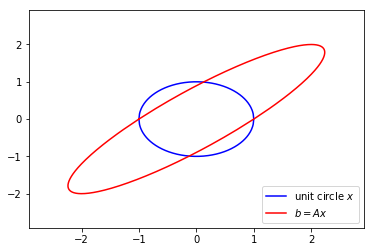

In [6]:
# Construct a unit circle representing the terminal points of a set of unit vectors
npts = 200
x = np.linspace(-1,1,npts)
y = np.sqrt(1-x**2)
# Construct unit vectors that trace out the unit circle
circ = np.hstack([np.array([x, y]),np.array([-x, -y])]) #<-- stack to top and bottom of the circle
# Construct the ellipse by multiplying A by the unit (circle) vectors
b = np.dot(A,circ)
ax = np.linalg.norm(b,1)/np.sqrt(2)
# Display the results
plt.plot(circ[0,:],circ[1,:],'b',b[0,:],b[1,:],'r')
plt.axis([-ax, ax, -ax, ax])
plt.legend(['unit circle $x$','$b = Ax$'],loc='lower right');

###### The eigenvalues (of a symmetric matrix) can help us determine the axes of the ellipse:
* minor axis component 1: $\lambda_{\min}v^{\min}_{1}$
* minor axis component 2: $\lambda_{\min}v^{\min}_{2}$
* major axis component 1: $\lambda_{\max}v^{\max}_{1}$
* major axis component 2: $\lambda_{\max}v^{\max}_{2}$

In [7]:
# Here is a peek at the output of the eig function
v,P = np.linalg.eig(A)
axratio = abs(max(v))/abs(min(v))
print('Eigenvalues of A = {}'.format(v))
print('')
print('Eigenvectors of A = \n{}'.format(P))
print('Note: eigenvectors are stored in the columns')
print('')
print('Length of minor axis is {}'.format(abs(min(v))))
print('Length of major axis is {}'.format(abs(max(v))))
print('')
print('Note: ratio of ellipse major to minor axis length is: {}'.format(axratio))
print('Note: cond(A) = ||A^-1||||A|| = {}'.format(np.linalg.cond(A)))

Eigenvalues of A = [1. 2.]

Eigenvectors of A = 
[[1.         0.89442719]
 [0.         0.4472136 ]]
Note: eigenvectors are stored in the columns

Length of minor axis is 1.0
Length of major axis is 2.0

Note: ratio of ellipse major to minor axis length is: 2.0
Note: cond(A) = ||A^-1||||A|| = 4.265564437074638


[back to top](#Sections)

### Condition Number Interpretation

###### How does the condition number (ratio of ellipse axis lengths) relate to how well $A^{-1}$ solves the system $Ax = b$? In other words, why should we care HOW we solve the matrix equation?

###### Randomly perturb the right-hand side of $Ax = b$ with $b+\delta b$ and overlay this pertubed vector on the ellipse $Ax$ (which should equal $b$).

aspect ratio of ellipse axes, i.e. cond(A) = 2.0


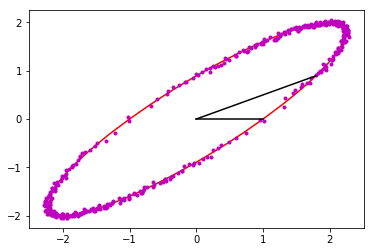

In [8]:
# Compute the eigenvectors and eigenvalues of A
v,P = np.linalg.eig(A)
# Obtain the indices of the max and min eigenvalues.
mx = np.argmax(abs(v))
mn = np.argmin(abs(v))
# Axes created by eigenvectors -- scaled by eigenvalues
# Construct the minor and major axes of the ellipse b = A*xx (from above)
minorx = np.linspace(0,v[mn]*P[0,mn],npts)
minory = np.linspace(0,v[mn]*P[1,mn],npts)
majorx = np.linspace(0,v[mx]*P[0,mx],npts)
majory = np.linspace(0,v[mx]*P[1,mx],npts)
# Compute the ratio of the largest to the smallest eigenvalue, i.e. condition number
axratio = abs(max(v))/abs(min(v))
print('aspect ratio of ellipse axes, i.e. cond(A) = {}'.format(axratio))
# Construct small random perturbations to the ellipse
db = np.random.rand(2,b.shape[1])*(-1)**np.round(np.random.rand(2,b.shape[1]))*5e-2
bdb = b + db
# Display the error cloud b + db with the minor and major axes of the ellipse, b
plt.plot(b[0,:],b[1,:],'r',bdb[0,:],bdb[1,:],'m.')
plt.plot(minorx,minory,'k',majorx,majory,'k');

###### Observe what happens if we apply $A^{-1}$ to the ellipse, $b+\delta b$. Note that we should recover the unit circle $x$.

In [ ]:
err = np.linalg.solve(A,bdb)
plt.plot(circ[0,:],circ[1,:],'b')
plt.plot(err[0,:],err[1,:],'c.')
ax = np.max([abs(err[0,:]),abs(err[1,:])])*1.5
plt.axis([-ax,ax,-ax,ax]);

[back to top](#Sections)